In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random as rng

In [3]:
IMAGE_NAME = "lynx_background.jpeg"

In [4]:
def display_image(image):
  # OpenCV normally shows in BGR, we want RGB so convert before displaying
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  # Remove the graph ticks
  plt.xticks([]), plt.yticks([]) 
  # Show the image
  plt.show()

In [5]:
# Check if a point is inside a rectangle
def rect_contains_point(rect, point):
  if point[0] < rect[0]:
    return False
  elif point[1] < rect[1]:
    return False
  elif point[0] > rect[2]:
    return False
  elif point[1] > rect[3]:
    return False
  return True

In [6]:
# Draw delaunay triangles
def draw_delaunay(image, subdiv, delaunay_color):
  triangleList = subdiv.getTriangleList()
  size = image.shape
  rectangle = (0, 0, size[1], size[0])

  for triangle in triangleList:
    pt1 = (int(triangle[0]), int(triangle[1]))
    pt2 = (int(triangle[2]), int(triangle[3]))
    pt3 = (int(triangle[4]), int(triangle[5]))

    if rect_contains_point(rectangle, pt1) and rect_contains_point(rectangle, pt2) and rect_contains_point(rectangle, pt3):
      cv2.line(image, pt1, pt2, delaunay_color, 1, cv2.LINE_AA, 0)
      cv2.line(image, pt2, pt3, delaunay_color, 1, cv2.LINE_AA, 0)
      cv2.line(image, pt3, pt1, delaunay_color, 1, cv2.LINE_AA, 0)

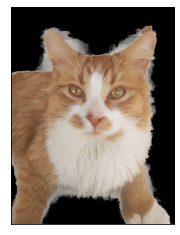

In [7]:
# Load the image
image = cv2.imread(IMAGE_NAME)
image_copy = image.copy()
display_image(image)

In [8]:
# Make a rectangle the size of the image so that we know the working area
size = image_copy.shape
working_area = (0, 0, size[1], size[0])

# Get the sub division of the working area for the image
subdiv = cv2.Subdiv2D(working_area)

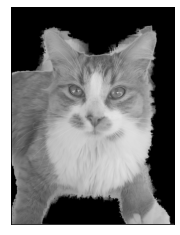

In [9]:
# Turn the image into greyscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_image(gray_image)

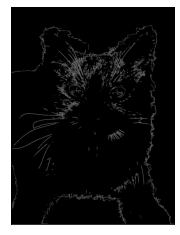

In [10]:
# Detect edges of the image
edge_image = cv2.Canny(gray_image, 100, 200)
display_image(edge_image)

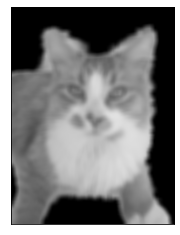

In [11]:
blur_image = cv2.blur(gray_image, (50, 50))
display_image(blur_image)

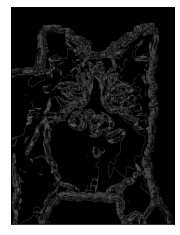

In [12]:
edge_blur_image = cv2.Canny(blur_image, 0, 6)
display_image(edge_blur_image)

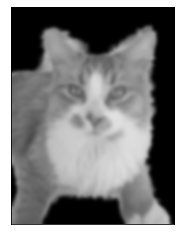

In [13]:
gaussian_blur_image = cv2.GaussianBlur(gray_image, (95, 95), 0)
display_image(gaussian_blur_image)

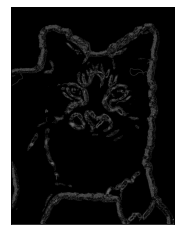

In [14]:
edge_gaussian_blur_image = cv2.Canny(gaussian_blur_image, 0, 9)
display_image(edge_gaussian_blur_image)

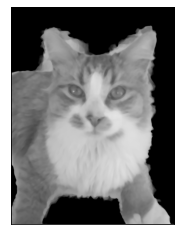

In [15]:
median_blur_image = cv2.medianBlur(gray_image, 21)
display_image(median_blur_image)

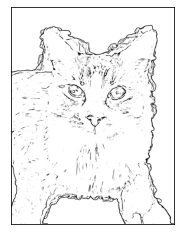

In [16]:
threshold_image = cv2.adaptiveThreshold(median_blur_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
display_image(threshold_image)

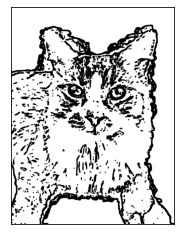

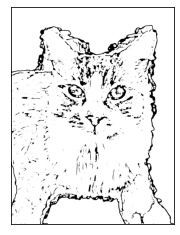

In [17]:
thresh_image = threshold_image.copy()
kernel = np.ones((9, 9), np.uint8)
img_erode = cv2.erode(thresh_image, kernel, iterations=1)
img_dilation = cv2.dilate(img_erode, kernel, iterations=1)
display_image(img_erode)
display_image(img_dilation)

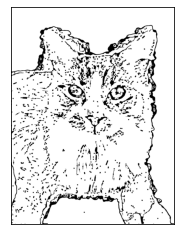

In [18]:
contours, _ = cv2.findContours(img_dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
  # calculate moments for each contour
  M = cv2.moments(c)
  # calculate x,y coordinate of center
  if M["m00"] != 0:
     cX = int(M["m10"] / M["m00"])
     cY = int(M["m01"] / M["m00"])
  else:
   cX, cY = 0, 0

  cv2.circle(img_dilation, (cX, cY), 5, (0, 0, 255), -1)

display_image(img_dilation)
    

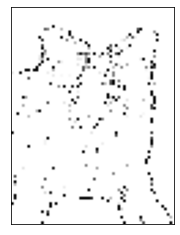

In [24]:
ratio = len(threshold_image) / len(threshold_image[0])

original_height = len(threshold_image)

original_width = len(threshold_image[0])

new_width = 60
new_height = int(ratio * new_width)
# Resize the image
resized_image = cv2.resize(threshold_image, (new_width, new_height))
display_image(resized_image)


[255 255 255 255 255 255 255 255 255 255 255 255 242 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 237 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0 255 255
 255 255 255 255 255 255]


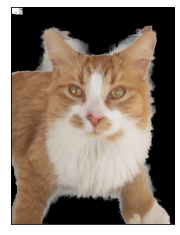

In [29]:
points = []

for i in range(len(resized_image)):
    for j in range(len(resized_image[0])):
        if resized_image[i, j] < 100:
          points.append((i, j))

# Insert the points into the sub division
for point in points:
  subdiv.insert(point)

# Colour for drawing
delaunay_color = (255, 255, 255)

# Draw the triangles
draw_delaunay(image_copy, subdiv, delaunay_color)
display_image(image_copy)

In [22]:
# Iterate over the array and print the dark pixels
# or we can use any other symbol too.
for i in range(len(resized_image)):
    for j in range(len(resized_image[0])):
        print("o" if resized_image[i, j] < 100 else ".", end="")
    print()

................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
.................................................................oo.............
................oo..................................................oo..........
..............o.......o.....................................o...o...............
.............................o..................................................
...............o.................o....................o.........................
..............o............o.........o...........o..............................
..............o.o................o.o...........oo...o...o.............o.........
............................